The dataset I have decided to use is the S&P500; I have modified it, from being a .csv to being a .xlsv. After that, the first and subsequent question can be explained. Some of the questions are grouped together; some of them require only the dataset to be spliced and parsed, and then used for subsequent code.

# QUESTION 1 
The first questions regards constructing a dataset that contains each of the 82 features. For the S&P500, it is 84 in actuality. Columns like 'Name' and 'Date' are initially dropped, along with every row that contains an emtpy cell inside of it. 

# QUESTION 2
The second question focuses on using the Kernel method, which utilizes a non linear regression in which the target value for a test point is estimated using the weighted average of the sorrounding points. The code is iterated five times and is fine tuned at each one for optimal results.

# FORMAT REMARKS
Question 1 and 2 are both included in the following code; Question 1 is also used in Question 3 and Question 4 

lambda: 0.5 		r^2: 0.999 		train MAE: 0.027 		test MAE: 0.034
lambda: 2.875 		r^2: 0.978 		train MAE: 0.098 		test MAE: 0.1
lambda: 5.25 		r^2: 0.91 		train MAE: 0.217 		test MAE: 0.214
lambda: 7.625 		r^2: 0.806 		train MAE: 0.345 		test MAE: 0.339
lambda: 10.0 		r^2: 0.689 		train MAE: 0.457 		test MAE: 0.449


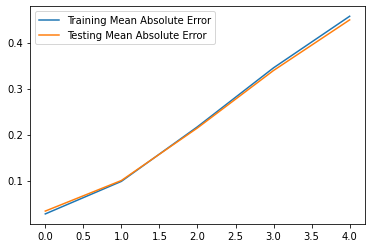

In [9]:
#KERNEL

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge

# Data is read and splitted between subsets dX and dY
d = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\python exam\Processed_S&P.xls')
d = d.dropna()
d = d.drop(columns = 'Name')
#dX receives everything but the 'Close' column, while dY receives nothing but the 'Close' column
d = d.drop(columns = 'Date')
dX = d.drop(columns='Close').to_numpy(dtype = float)
dY = d[['Close']].to_numpy(dtype = float)
#Both subsets are standardized 
dX = ((dX - dX.mean())/(dX.std()))
dY = ((dY - dY.mean())/(dY.std()))
#Data is trained, tested and splitted
trainX, testX, trainY, testY = train_test_split(dX, dY, test_size = 0.20, random_state = 1)
#the function gaussianWrapper is used to iterate it five times and pass the Kernel value
def gaussianWrapper(lam):
    
    def GaussianKernel(x0, x):
        return (1 / lam) * np.exp(-np.linalg.norm(x0 - x)) / (2 * lam)
    
    return GaussianKernel

#Lambda values begin at 0.5 and end at 10, with 5 increments 
lamValues = np.linspace(0.5, 10, 5)
M = lamValues.shape[0]
fig, axes = plt.subplots(nrows=1)
trainMAE = []
testMAE = []
for i in lamValues:
    #Kernel ridge is created using the KernelRidge scikit learn function and each value is predicted, and outputted.
    reggie = KernelRidge(alpha=1.0, kernel=gaussianWrapper(i))
    reggie.fit(trainX, trainY)
    trainPredictions = reggie.predict(trainX)
    testPredictions = reggie.predict(testX)

    trainError = mean_absolute_error(trainY, trainPredictions)
    testError = mean_absolute_error(testY, testPredictions)

    trainMAE.append(trainError)
    testMAE.append(testError)
    #Plot is outputted as well
    print('lambda:', np.round(i, 3), '\t\tr^2:', np.round(r2_score(trainY, trainPredictions), 3),
        '\t\ttrain MAE:', np.round(trainError, 3), '\t\ttest MAE:', np.round(testError, 3))
axes.plot(range(M), trainMAE, label='Training Mean Absolute Error')
axes.plot(range(M), testMAE, label='Testing Mean Absolute Error')
axes.legend()

# REMARKS
The optimal R^2 value is found to be for a lambda of 0.5; it seems that the lower you go, the better R^2, in truth, once the lambda value is below 0.442, the R^2 will be 1.0, which is impossible. The test and training MAE follow such hypothesis. The graph futher demonstrates my points.


# QUESTION 3 
Question 3 uses Radial Basis Functions for the predictions. Radial Basis Functions assign a real value to each input form its domain and the value produced by the function is always an absolute value. The program is iterated five times and fine tuned each time. Question 3 was by far the hardest of all.

C:\Users\marti\AppData\Local\Temp\ipykernel_14068\3829264695.py:139: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfX = df.drop('Close', 1).to_numpy(dtype = float)


Epoch 0 	Loss = 10.818194391390868
Epoch 40 	Loss = 4.722331959588517
Epoch 80 	Loss = 2.148936399770201
Epoch 120 	Loss = 1.0857244544416773
Epoch 160 	Loss = 0.6583273991349764
The mean absolute error on the training set is 0.1537789511044517
The r^2 is:  0.9562549558680202
Epoch 0 	Loss = 11.399563388081766
Epoch 40 	Loss = 3.7766976725161214
Epoch 80 	Loss = 1.384882307724907
Epoch 120 	Loss = 0.6480003897301404
Epoch 160 	Loss = 0.42615493447029545
The mean absolute error on the training set is 0.13148458883182326
The r^2 is:  0.9678788146230276
Epoch 0 	Loss = 10.998825331630414
Epoch 40 	Loss = 2.953147337402687
Epoch 80 	Loss = 0.9892225879515717
Epoch 120 	Loss = 0.5074165018846741
Epoch 160 	Loss = 0.39163726280530725
The mean absolute error on the training set is 0.13407317329436905
The r^2 is:  0.9676032680789461
Epoch 0 	Loss = 10.66435203481837
Epoch 40 	Loss = 0.6673198431673011
Epoch 80 	Loss = 0.8956188340989204
Epoch 120 	Loss = 1.9880435859046544
Epoch 160 	Loss = 5.

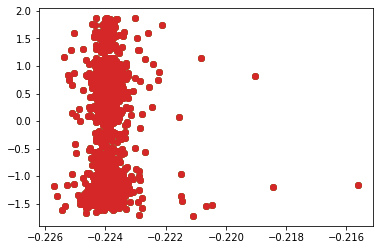

In [5]:
#RBF
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

class GaussianRBFnetwork:
    def __init__(self, d, M, alpha = 0.001, initialization = 'uniform'):
        self.d = d
        self.M = M
        self.alpha = alpha

        if initialization == 'uniform':
            theta = 0.25* np.random.uniform(-1, 1, size = (M + 1))
            lam =7* np.random.uniform(0, 1, size = (M))
            xi = 0.3* np.random.uniform(-1, 1, size = (M, d))

        self.theta = theta
        self.lam = lam
        self.xi = xi
                
    def fit(self, X, y, epochs = 1000, update = 10, annealing = False):
        self.n = X.shape[0]
        
        self.input = np.hstack((np.ones([self.n, 1]), X))
        
        self.output = y
        
        XK = np.zeros([self.n, self.M])
        XK = np.hstack((np.ones([self.n, 1]), XK))
        
        alpha = copy.copy(self.alpha)
        
        for j in range(epochs):
            for i in range(self.n):
                for k in range(self.M):
                    XK[i, k + 1] = self.GaussianKernel(self.input[i, 1:], self.xi[k], self.lam[k])
                        
            predictions = XK @ self.theta
            
            error = predictions - self.output

            weightederror = np.atleast_2d(error).T * XK
            
            thetagrad = np.sum(weightederror, axis = 0)
            
            term3 = np.zeros([self.n, self.M])
            for k in range(self.M):
                term3[:, k] = ((np.linalg.norm(self.xi[k] - self.input[:,1:], axis = 1)/self.lam[k]) ** 2 - 1) * self.theta[k]/self.lam[k]
            
            lamerror = term3 * weightederror[:, 1:]
            lamgrad = np.sum(lamerror, axis = 0)

            term4 = np.zeros([self.n, self.M, self.d])
            for k in range(self.M):
                for l in range(self.d):
                    term4[:, k, l] = (self.input[:, l] - self.xi[k, l]) * self.theta[k] / self.lam[k] ** 2

            xierror = term4 * np.atleast_3d(weightederror[:, 1:])
            xigrad = np.sum(xierror, axis = 0)
            
            self.theta -= self.alpha * thetagrad
            self.lam -= self.alpha * lamgrad
            self.xi -= self.alpha * xigrad

            self.lam = np.abs(self.lam)
                        
            if annealing:
                self.alpha = (1 - j / epochs) * alpha
                
            if j % update == 0:
                print('Epoch', j, '\tLoss =', np.sum(error ** 2)/self.M)

    def predict(self, X):
        n = X.shape[0]
        X = np.hstack((np.ones([n, 1]), X))
        
        XK = np.zeros([n, self.M])
        XK = np.hstack((np.ones([n, 1]), XK))
        
        for i in range(n):
            for k in range(self.M):
                XK[i, k + 1] = self.GaussianKernel(X[i, 1:], self.xi[k], self.lam[k])
                
        predictions = XK @ self.theta

        return predictions
    
    def GaussianKernel(self, x, xi, lam):
        return (1/lam) * np.exp(-np.linalg.norm(x - xi) ** 2 / (2 * lam ** 2))

#As previouslt, the file is read and the rows with any null values are eliminated
df = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\python exam\Processed_S&P.xls')

df = df.dropna()

#Both the 'Name' and 'Date' columns are eliminated
df = df.drop(columns = 'Name')
df = df.drop(columns = 'Date')
#Both the new subsets are formed, as in the previous questions 
dfX = df.drop('Close', 1).to_numpy(dtype = float)
dfY = df[['Close']].to_numpy(dtype = float)

#The data is once again standardized
dfX = ((dfX - dfX.mean())/(dfX.std()))
dfY = ((dfY - dfY.mean())/(dfY.std()))
#Train-test-split function is applied
trainX, testX, trainY, testY = train_test_split(dfX, dfY, test_size = 0.20, random_state = 1)
#1D Array containing all the usable alpha vatiables: there are 5, 1 for each iteration
alphaValues = [0.0005, 0.0006, 0.0008, 0.002]
#For loop used for each alpha value
for j in alphaValues:
    #the RBF function is initialized: 81 dimensions and 80 different radial basis functions 
    model = GaussianRBFnetwork(d = 81, M = 80, alpha = j, initialization = 'uniform')
    #model is fitted and predictions are made 
    model.fit(trainX, trainY.T, epochs = 200, update = 40, annealing = False)
    trainPredictions = model.predict(trainX)
    plt.scatter(dfX[:,0], dfY.T, label = 'Training Data')
    #The curves are predicted
    yModel = model.predict(testX)
    #Test predictions are computed 
    testPredictions = model.predict(testX)
    #Along with the errors
    trainError = mean_absolute_error(trainY, trainPredictions)
    testError = mean_absolute_error(testY, testPredictions)
    #And the quality metrics are returned 
    print('The mean absolute error on the training set is', trainError)
    print('The r^2 is: ', r2_score(trainY, trainPredictions))


# REMARKS 
As it should, with each epoch comes a lower loss. For this reason, question 3 may be deemed a success. The code runs through 200 epochs, going 40 at a time. The alpha is changed each time, and the best alpha is found to be the lowest. There is no graph for the code.

# QUESTION 4
Question 4 builds from the previous question; it implements the LASSO method ( with lambdas ) into the Radial Basis Functions formats. 
The LASSO method is a regression analysis method that performs the regularization and variable selection in order to enhance the prediction accuracy. It does contain a graph that plots the logarithmic scales of the different lambda values vs the coefficients assigned to the lambdas.

Epoch 0 	Loss = 11.338558381336231
Epoch 20 	Loss = 7.014401681406994
Epoch 40 	Loss = 4.565824398377108
Epoch 60 	Loss = 3.003684518958707
Epoch 80 	Loss = 2.0094672218240537
(891, 81) before
(891, 82)
(223, 81) before
(223, 82)
(223, 81) before
(223, 82)
The mean absolute error on the training set is 0.2927764074706138
The r^2 is:  0.8766937382745021


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.03162277660168379, 3162277660.1683793, -72.927812532783, 159.86935686164784)

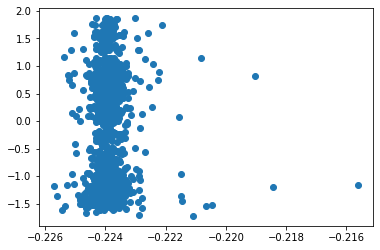

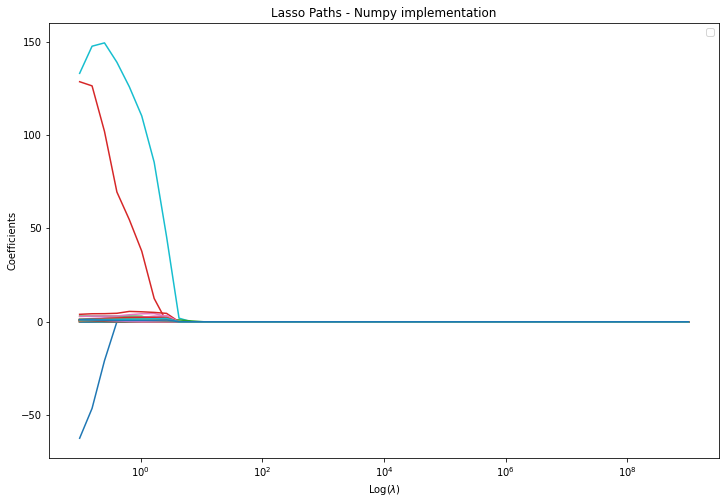

In [10]:
#RBF + LASSO
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

class GaussianRBFnetwork:
    #lammone is an added parameter that is used to bring the RBF values into the LASSO model plot
    #alpha is set to default to 0.001
    def __init__(self, d, M, alpha = 0.001, initialization = 'uniform', lammone = 0.01):
        self.d = d
        
        self.M = M
                
        self.alpha = alpha
        
        if initialization == 'uniform':
            theta = 0.24* np.random.uniform(-1, 1, size = (M + 1))
            lam =7.3* np.random.uniform(0, 1, size = (M))
            xi = 0.39* np.random.uniform(-1, 1, size = (M, d))

        self.theta = theta
        self.lam = lam
        self.xi = xi
        #lammone is passed as a parameter 
        self.lammone = lammone
                
    def fit(self, X, y, epochs = 1000, update = 10, annealing = False):
        self.n = X.shape[0]
        
        self.input = np.hstack((np.ones([self.n, 1]), X))
        
        self.output = y
        
        XK = np.zeros([self.n, self.M])
        XK = np.hstack((np.ones([self.n, 1]), XK))
        
        alpha = copy.copy(self.alpha)
        
        for j in range(epochs):
            for i in range(self.n):
                for k in range(self.M):
                    XK[i, k + 1] = self.GaussianKernel(self.input[i, 1:], self.xi[k], self.lam[k])
                        
            predictions = XK @ self.theta
            
            error = predictions - self.output

            weightederror = np.atleast_2d(error).T * XK
            
            # compute the theta partial derivatives
            thetagrad = np.sum(weightederror, axis = 0)
            
            # compute the lambda partial derivatives
            term3 = np.zeros([self.n, self.M])
            for k in range(self.M):
                term3[:, k] = ((np.linalg.norm(self.xi[k] - self.input[:,1:], axis = 1)/self.lam[k]) ** 2 - 1) * self.theta[k]/self.lam[k]
            
            lamerror = term3 * weightederror[:, 1:]
            lamgrad = np.sum(lamerror, axis = 0)

            # compute the xi partial derivatives
            term4 = np.zeros([self.n, self.M, self.d])
            for k in range(self.M):
                for l in range(self.d):
                    term4[:, k, l] = (self.input[:, l] - self.xi[k, l]) * self.theta[k] / self.lam[k] ** 2

            xierror = term4 * np.atleast_3d(weightederror[:, 1:])
            xigrad = np.sum(xierror, axis = 0)
            
            #lammone is used for the definition of the various functioning parameters  
            thetagrad += self.lammone * np.sign(self.theta)
            lamgrad += self.lammone * np.sign(self.lam)
            xigrad += self.lammone * np.sign(self.xi)



            self.theta -= self.alpha * thetagrad
            self.lam -= self.alpha * lamgrad
            self.xi -= self.alpha * xigrad

            self.lam = np.abs(self.lam)
                        
            if annealing:
                self.alpha = (1 - j / epochs) * alpha
                
            if j % update == 0:
                print('Epoch', j, '\tLoss =', np.sum(error ** 2)/self.M)

    def predict(self, X):
        n = X.shape[0]
        print(X.shape, 'before')
        X = np.hstack((np.ones([n, 1]), X))
        print(X.shape)
        # initialize the kernel-weighted inputs
        XK = np.zeros([n, self.M])
        XK = np.hstack((np.ones([n, 1]), XK))
        
        for i in range(n):
            for k in range(self.M):
                XK[i, k + 1] = self.GaussianKernel(X[i, 1:], self.xi[k], self.lam[k])
                
        predictions = XK @ self.theta

        return predictions
    
    def GaussianKernel(self, x, xi, lam):
        return (1/lam) * np.exp(-np.linalg.norm(x - xi) ** 2 / (2 * lam ** 2))

#The same operations performed on RBF are performed here 

dataFrame = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\python exam\Processed_S&P.xls')
dataFrame = dataFrame.dropna()
dataFrame = dataFrame.drop(columns = 'Name')
dataFrame = dataFrame.drop(columns = 'Date')
dataFrameX = dataFrame.drop('Close', 1).to_numpy(dtype = float)
dataFrameY = dataFrame[['Close']].to_numpy(dtype = float)
dataFrameX = ((dataFrameX - dataFrameX.mean())/(dataFrameX.std()))
dataFrameY = ((dataFrameY - dataFrameY.mean())/(dataFrameY.std()))
trainX, testX, trainY, testY = train_test_split(dataFrameX, dataFrameY, test_size = 0.20, random_state = 1)


model = GaussianRBFnetwork(d = 81, M = 80, alpha = 0.0005, initialization = 'uniform', lammone = 0.01)


model.fit(trainX, trainY.T, epochs = 100, update = 20, annealing = False)
trainPredictions = model.predict(trainX)

plt.scatter(dataFrameX[:,0], dataFrameY.T, label = 'Training Data')


yModel = model.predict(testX)


testPredictions = model.predict(testX)

trainError = mean_absolute_error(trainY, trainPredictions)
testError = mean_absolute_error(testY, testPredictions)
    
print('The mean absolute error on the training set is', trainError)
print('The r^2 is: ', r2_score(trainY, trainPredictions))

#The LASSO model begins here with these definitions
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0

#lammy is used to include the RBF model in the LASSO method
def coordinate_descent_lasso(theta,X,y,lammy = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            
            # predict y values by linear regression
            y_pred = X @ theta
            
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)

            # thresholding
            theta[j] =  soft_threshold(rho, lammy)   
            
    return theta.flatten()

m,n = dataFrameX.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,10,50)/10 
for l in lamda:
    #lammy replaces the standardized lamda from the original code.
    theta = coordinate_descent_lasso(initial_theta,dataFrameX,dataFrameY,lammy = l, num_iters=50)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')



# REMARKS
An interesting fact about this exercise was the fact that, in the training-testing-splitting function, instead of the y vector, the transpose of it had to be used, so as to match the rows with its x equivalent.

# QUESTION 5 
Question 5 proved to be a difficult one. The 'Dates' column had to be converted from weekday names to weekday numbers (0 for Monday, 1 for Tuesday and so forth); this was done through the use of a python library. This is done in order to test the data on the first four days of the week, and to predicted for the Fridays. 

# QUESTION 6
Using the dataset from Question 5, Friday values are predicted using "simple" Linear Regression. The problem is: Linear Regression is used for linear datasets; this is not linear, it also has 82 dimensions. The R^2 is horrible and no one should EVER trust it for purposes like this. So another way must be found. I tried for Kernel regression, which worked quite well, as is shown below.

# FORMAT REMARKS
As for Question 1 and 2, Question 5 and 6 are placed in the same batch of code.

(352, 88)
The r^2 score is 0.9690358430030949
The mean squared error on the training set is 4320.0580965634435
The theta values are [ 4.529880e+03 -6.678400e+02  6.209540e+03 -1.075810e+03  2.151870e+03
  3.355640e+03  6.806810e+03  2.258400e+03  8.898510e+03 -2.627550e+03
 -1.224700e+03 -2.759040e+03 -3.488990e+03  1.402490e+03 -7.435400e+02
 -2.162380e+03  8.878000e+01 -1.628250e+03  5.393020e+03  1.305280e+03
  9.234100e+02  2.668000e+03  5.997320e+03 -2.563240e+03  6.352750e+03
 -4.785110e+03  1.020040e+03 -1.298580e+03  5.152970e+03  3.055970e+03
 -4.101500e+03  1.966030e+03 -9.013000e+02 -1.516090e+03  2.627510e+03
 -4.878180e+03 -3.497900e+02 -5.808060e+03 -1.109940e+03  2.444970e+03
 -3.225000e+01  1.272580e+03 -4.285900e+02  3.842250e+03 -1.340343e+04
 -3.010300e+03 -1.082710e+03 -1.103060e+03 -8.205500e+03 -5.918270e+03
 -8.445400e+02  3.303460e+03  4.646020e+03 -1.000509e+04 -1.065810e+03
  1.211895e+04  4.726080e+03 -1.900320e+03 -1.061202e+04 -9.822910e+03
 -9.201200e+02  

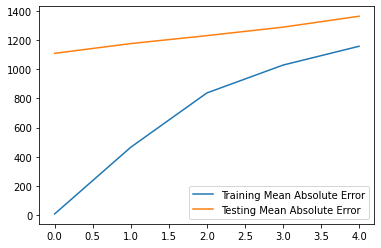

In [11]:
#6 Predict the stock prices; start with linear regression and move on over.

import csv
from statistics import linear_regression
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Used primarily to draw plots
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #Used primarily to split data to train it
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Function used to standardize the various values from a file
def standardize(X):
    n = X.size
    X = X.astype('float')

    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
    return X


#Class to define and contain an Ordinary Least Squares model
class OrdinaryLeastSquares:
        
    # The model us fit to the data
    def fit(self, X, y):
        # The trained data is saved
        self.data = np.hstack((np.ones([X.shape[0],1]), X))
        
        # The training labels are saved
        self.outputs = y
        
        # The beta values that minimize the mean squared error are saved
        X = self.data
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
    # Function to predict the output
    def predict(self, X):
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # The output is returned 
        return X @ self.theta


#Function define and find a univariate polynomial of any integer basis
def univariatePolynomialBasis(M):
    def polynomialM(x):
        #An array is created, which will be returned 
        out = np.array([])
        for i in range(M+1):
            out = np.append(out, x * i)
        
        return out
    print(polynomialM)
    return polynomialM

#Function to define and contain exponentials of any basis'
def expBasis(M):
    def exponential(x):
        #An array is created, which will be returned 
        out = np.array([])
        for i in range(-M, M + 1):
            out = np.append(out, np.exp(x*i/M))
        
        return out
    
    return exponential


dataFrame = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\python exam\Processed_S&P.xls')

#drop all rows with NULL parameters
dataFrame = dataFrame.dropna()

#The 'Name' column is dropped.
dataFrame = dataFrame.drop(columns = 'Name')
dataFrame['Date'] = dataFrame['Date'].dt.dayofweek
#The X subset contains all the rows with a week value that is not 4 (Friday)
#while the Y subset contains all rows with a week value of 4 
dataFrameX = dataFrame.loc[dataFrame['Date'] != 4].to_numpy
dataFrameY = dataFrame.loc[dataFrame['Date'] == 4]
dataFrameY = dataFrameY['Close'].to_numpy


dtX = pd.DataFrame()
dtY = pd.DataFrame()
for i in range(len(dataFrame["Date"])-4):
        #New datasets are created, X will have all the full weeks from Monday to Thursday, while Y will only have Fridays
        if(dataFrame["Date"].iloc[i] == 0 and dataFrame["Date"].iloc[i+1] == 1 and dataFrame["Date"].iloc[i+2] == 2 and dataFrame["Date"].iloc[i+3]  ==3 and dataFrame["Date"].iloc[i+4] == 4):
            dtX = dtX.append(dataFrame.iloc[i],ignore_index = True)
            dtX = dtX.append(dataFrame.iloc[i+1],ignore_index = True)
            dtX = dtX.append(dataFrame.iloc[i+2],ignore_index = True)
            dtX = dtX.append(dataFrame.iloc[i+3],ignore_index = True)
            dtY = dtY.append(dataFrame.iloc[i+4],ignore_index = True)

dtY = dtY['Close']
dtX['new1'] = 0
dtX['new2'] = 0
dtX['new3'] = 0
dtX['new4'] = 0
dtX['new5'] = 0
standardize(dtX)
dtX.to_numpy
dtY.to_numpy
print(dtX.shape)
trainX, testX, trainY, testY = train_test_split(dtX.T, dtY, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(trainX, trainY)
trainPredictions = model.predict(trainX)
print('The r^2 score is', model.score(trainX, trainY))
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The theta values are', np.round(model.coef_, 2))
predictions = model.predict(testX)   
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))
#NOT GOOD

#NOW DO KERNEL
#The code for the kernel method is the same as the above, just with changed datasets 
def gaussianWrapper(lam):
    
    def GaussianKernel(x0, x):
        return (1 / lam) * np.exp(-np.linalg.norm(x0 - x)) / (2 * lam)
    
    return GaussianKernel





lamValues = np.linspace(0.05, 2, 5)

M = lamValues.shape[0]

# Multiple plots are allowed 
fig, axes = plt.subplots(nrows=1)
#both the train and test Mean Average Errors vectors are defined 
trainMAE = []
testMAE = []
for i in lamValues: #and for each 
    reggie = KernelRidge(alpha=1.0, kernel=gaussianWrapper(i))
    reggie.fit(trainX, trainY)
    trainPredictions = reggie.predict(trainX)
    testPredictions = reggie.predict(testX)

    # compute the training and test mean absolute error
    trainError = mean_absolute_error(trainY, trainPredictions)
    testError = mean_absolute_error(testY, testPredictions)

    # save the training and test mean absolute error
    trainMAE.append(trainError)
    testMAE.append(testError)

    #Qaulity metrics are returned 
    print('lambda:', np.round(i, 3), '\t\tr^2:', np.round(r2_score(trainY, trainPredictions), 3),
        '\t\ttrain MAE:', np.round(trainError, 3), '\t\ttest MAE:', np.round(testError, 3))
axes.plot(range(M), trainMAE, label='Training Mean Absolute Error')
axes.plot(range(M), testMAE, label='Testing Mean Absolute Error')
axes.legend()

# REMARKS

Question 6 proves that, for big datasets with lots of dimensions like this, linear regression is not the best. Kernel was used, and presents a better R^2 value, but there are much better algorithms and methods out there. In addition, the two subsets had to be drastically modified from the Question 1 version: the X subset contains any week, from Monday to Thursday, while the Y subset contains all the Fridays. More specifically, the X's are rows that are Monday through Thursday, without skipping any days in the middle of the week, while Y's are all the Fridays, which will be predicted. This is done through the function dayOfWeek, which assigns a numerical value to the week day (0 for Monday, 1 for Tuesday and so on).